1. To begin we need to import the necessary modules for this tutorial.
- *NumPy*: provides a variety of mathematical functions
- *SciPy*: more complex functions that builds on NumPy's capabilites
- *Matplotlib*: a data visualisation library that integrates well with Jupyter Notebooks
- *Scikit-learn*: provides supervised and unsupervised learning algorithms which can be used for a multitude of AI/ML purposes such as regression, classification, clustering, etc.

In [130]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

2. The first example of this tutorial will be to show how using these modules we can solve a curve fitting regression problem. 
- We will generate a dataset and then try to fit a function to the data.
- This example will display some of the functionality of these modules to carry out an unsupervised machine learning regression analysis.

2.1 To start with a deterministic nonlinear function for the model is defined

In [131]:
def func(x):
    return np.exp(3*x) + 2*np.exp(-2*x)

2.2 The values along the curve are then generated using NumPy and the declared function

In [132]:
x_train = np.linspace(0., 2, 200)
y_train = func(x_train)

2.3 Now we generate data points and use the function _func_ and add Gaussian noise to the dataset


In [133]:
x = np.array([.0, .1, .2, .4, .6, .8, 1])
y = func(x) + 2 * np.random.randn(len(x))

2.4 Now we plot the data points and produce the curve using Matplotlib

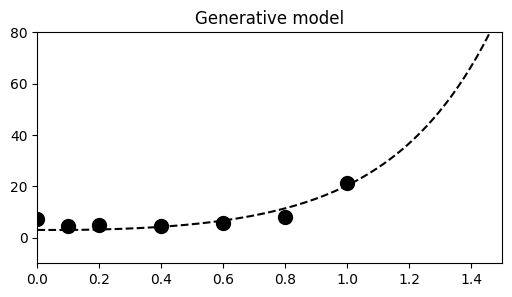

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')
plt.show()

2.5 Now that we have the generative model established we can use the capabilites of scikit-learn to fit a linear model to the data in these three steps:
1. Create the model using Linear Regression
2. Fit the model to the dataset
3. Use the model to predict values

In [135]:
lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_lr = lr.predict(x_train[:, np.newaxis])

2.6 We now plot the linear regression curve on the graph we produced previously

Text(0.5, 1.0, 'Linear regression')

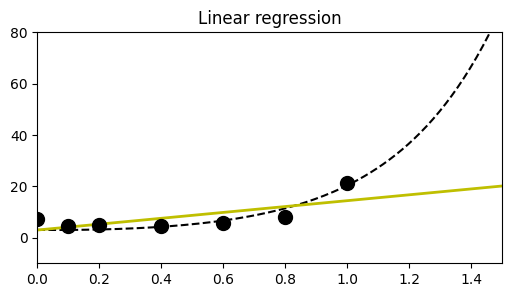

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
ax.plot(x_train, y_lr, 'y', lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Linear regression')

2.7 The model we have just produced however is not well adapted to the dataset as it is a linear fit whereas the data points generated were produced using a nonlinear model which results in an exponential curve. Therefore for this data a nonlinear model is more appropriate. We can achieve this by still using linear regression but we have to use the *NumPy* function *np.vander()* which allows us to create a Vandermonde matrix. With this matrix we can then fit a polynomial to the data, the degree of the polynomial is the number of columns in the matrix. The following code shows how to do this and provides the visualtion of the fit for a range of polynomial degrees.

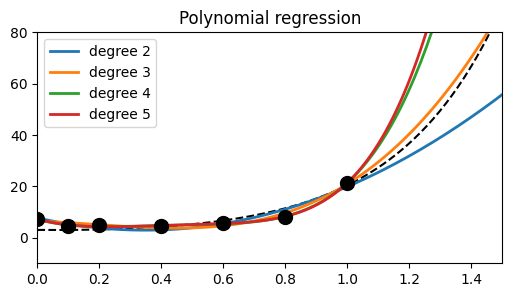

In [137]:
lrpoly = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
for deg in [2, 3, 4, 5]:
    lrpoly.fit(np.vander(x, deg+1), y)
    y_lrpoly = lrpoly.predict(np.vander(x_train, deg+1))
    ax.plot(x_train, y_lrpoly, label='degree {}'.format(deg), lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Polynomial regression')
ax.legend(loc=2)

2.8 From the results of this we can see that all the polynomial models fit the data relatively well but the higher the degree of the polynomial the more likely it is to overfit the data. This is because the model is more complex and therefore has more parameters to fit to the data. This is a problem as the model will not generalise well to new data. Therefore we need to find a balance between the complexity of the model and the amount of data we have. This is known as the bias-variance tradeoff, a model with high bias will not fit the data well and a model with high variance will overfit the data. 

2.9 We can use a separate model called ridge regression which works in a similar way to linear regression but it prevents the polynomial coefficients from becoming too large in turn reducing the variance of the model. The following code shows how to use ridge regression to fit a polynomial to the data and provides the visualisation of the fit for a range of polynomial degrees.

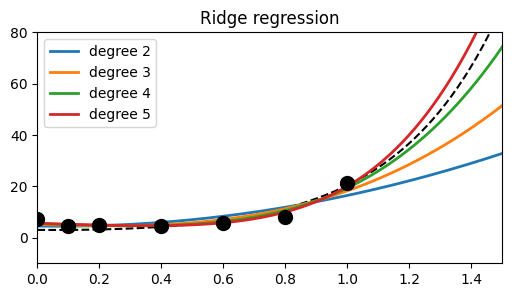

In [138]:
ridge = lm.RidgeCV()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
for deg in [2, 3, 4, 5]:
    ridge.fit(np.vander(x, deg+1), y)
    y_ridge = ridge.predict(np.vander(x_train, deg+1))
    ax.plot(x_train, y_ridge, label='degree {}'.format(deg), lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Ridge regression')
ax.legend(loc=2)

The results from the ridge regression model show that the issue of overfitting is reduced but for the simpler polynomial degrees there is now more underfitting than before. This can likely be attributed to the coefficients being used in the model being smaller than before. This is because the ridge regression model penalises the coefficients for being too large.

3. The next example will be to show how using these modules we can solve a classification problem.
- We will use the IRIS dataset which is a dataset that contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The dataset contains 4 features: sepal length, sepal width, petal length and petal width. We will import this dataset from scikit-learn.
- For this example we will also use *pandas* which is a useful module for displaying data in a tabular format.

In [154]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

3.1 With the dataset imported we can now use the pandas module to display the data in a tabular format

In [155]:
irisdf = pd.DataFrame(iris['data'], columns = iris['feature_names'])
irisdf['target'] = pd.Series(iris['target'], name = 'target_values')
irisdf['target_name'] = irisdf['target'].replace([0,1,2],
['iris-' + species for species in iris['target_names'].tolist()])
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa


3.2 We can also use the pandas module to display the data in a matplotlib scatter graph

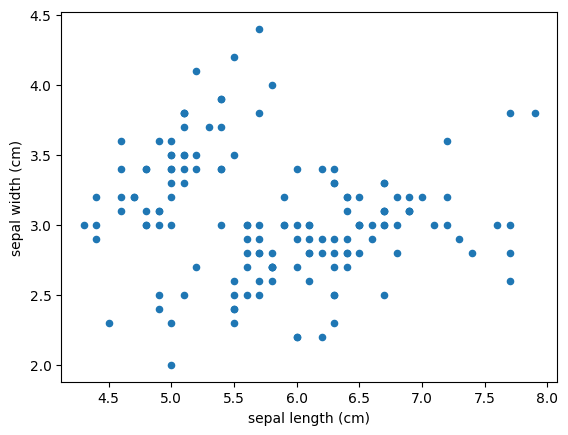

In [156]:
irisdf.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')
plt.show()

3.3 To better represent the data we can calculate the interquartile range to determine the outliers and then remove them from the dataset. The outliers are plotted in red in the following graph.

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

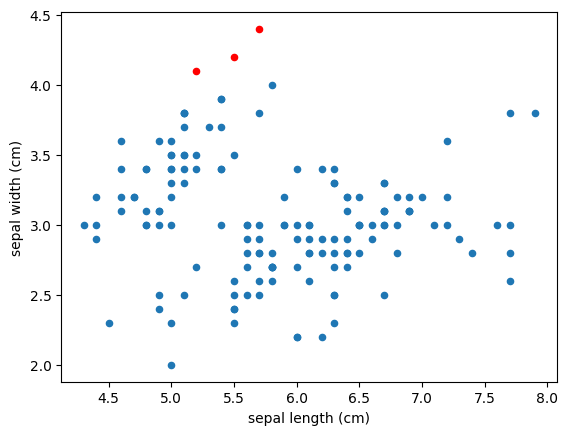

In [162]:
IQR = irisdf["sepal width (cm)"].quantile(0.75) - irisdf["sepal width (cm)"].quantile(0.25)
outliers = irisdf[irisdf["sepal width (cm)"] > irisdf["sepal width (cm)"].quantile(0.75) + 1.5*IQR]
usual = irisdf.drop(outliers.index)
ax = usual.plot(x="sepal length (cm)", y="sepal width (cm)", kind="scatter")
outliers.plot(x="sepal length (cm)", y="sepal width (cm)", kind="scatter", c="red", ax=ax)

3.4 Now that we have the data we can use the scikit-learn module to train a model to classify the dataset. 
- The first step in this process is to split the data into a training set and a test set. We can do this using the *train_test_split()* function from scikit-learn.
- During this process we also need to specify the proportion of the data that will be used for training and testing. This is done by setting the *test_size* parameter to the desired proportion. In this case we will use 30% of the data for testing and 70% for training.
- The target values are removed from the training and test sets as these are the values the model will try to predict.

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisdf.drop(["target_name", "target"], axis=1), irisdf["target_name"], test_size=0.3, random_state=0)

3.5 The classifying model we will use is the K-Nearest Neighbors model. This model works by finding the K nearest neighbors to a data point and then classifying the data point based on the majority class of the neighbors. 

In [228]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

3.6 We can now ask the model to calculate the accuracy of the predictions it makes on the test set. This is done by using the *score()* function.

In [229]:
knn.score(X_train, y_train)
knn.score(X_test, y_test)

0.9777777777777777

3.7 Using scikit-learn functions we can provide an accuracy score, classification report and confusion matrix for the model.
- We let the model predict the classes of the test set to then produce this information.
- We can see that the model has a high accuracy score and a high precision and recall for each class. This means that the model is performing well and is able to classify the data points correctly.

In [230]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9777777777777777
Classification report:
                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        16
iris-versicolor       1.00      0.94      0.97        18
 iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
